In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)

n = 120

X1 = np.random.uniform(10, 50, n)
X2 = np.random.uniform(100, 500, n)
X3 = np.random.uniform(1, 10, n)

# true relationship
y = 5 + 2*X1 + 0.5*X2 - 3*X3 + np.random.normal(0, 20, n)

data = pd.DataFrame({
    "Feature1": X1,
    "Feature2": X2,
    "Feature3": X3,
    "Target": y
})

data.head()


,Feature1,Feature2,Feature3,Target
0,24.981605,422.976062,9.464127,269.779195
1,48.028572,458.436520,9.585357,276.763023
2,39.279758,227.201390,9.233780,212.119539
3,33.946339,144.020770,4.331428,92.867023
4,16.240746,191.174065,1.139110,126.615493


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  120 non-null    float64
 1   Feature2  120 non-null    float64
 2   Feature3  120 non-null    float64
 3   Target    120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB
None


In [4]:
print(data.describe())

         Feature1    Feature2    Feature3      Target
count  120.000000  120.000000  120.000000  120.000000
mean    29.084403  293.386432    5.587655  194.930189
std     11.913120  114.971916    2.627083   61.076766
min     10.220885  102.024634    1.129541   80.182707
25%     17.921299  195.632322    3.564005  146.419549
50%     29.320210  301.063223    5.823954  195.293084
75%     40.274385  382.123610    7.647534  237.249127
max     49.475477  494.260182    9.910485  346.213468


In [5]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Feature1    0
Feature2    0
Feature3    0
Target      0
dtype: int64


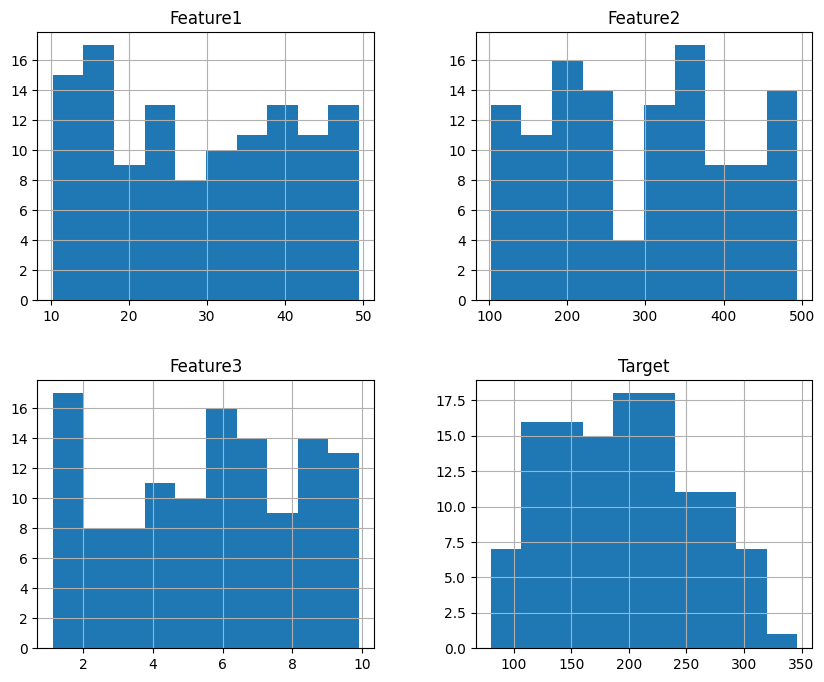

In [6]:
# Distribution
data.hist(figsize=(10,8))
plt.show()

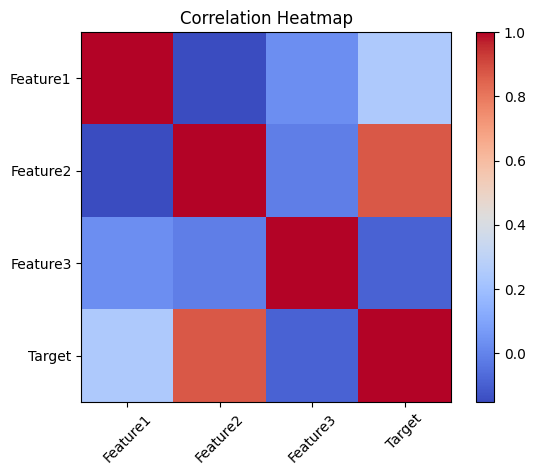

In [7]:
# Correlation heatmap
plt.imshow(data.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(4), data.columns, rotation=45)
plt.yticks(range(4), data.columns)
plt.title("Correlation Heatmap")
plt.show()